# **Multiple Linear Regression**
Original notebook by

*Prima Dewi Purnanasari*

Notebook dapat diakses di:

https://colab.research.google.com/drive/11xUo-L_vh9V_qYy3SSuPslK8MsxVjhuH

###**Modified and remodeled by**

**Kelompok 16**
- Fahrezy H (2106731466)
- Raditya Akhila Ganapati (2206026151)
- Annisa Ardelia Setiawan (2206059471)
- Ivander Andreas Wijaya (2206031896)

####***Homework Instruction***

**TK02 (Tugas Kelompok - 02)**

Modifikasi program untuk Multivariable/Multiple Linear Regression. Fitur yang dipilih (x)  bebas, sejumlah 4 variabel. Nilai yang akan diprediksi (y) bebas, pilih salah satu.

Kerjakan secara berkelompok, dikumpulkan dalam bentuk:
1. Print to PDF dari notebook yang dibuat
2. URL Google Colab tercantum di baris paling atas
3. Nama kelompok dan anggota yang mengerjakan dicantumkan setelah URL

##**Multiple Linear Regression**

Pada simple linear regression dengan 1 variabel, maka tujuan pembelajaran mesin adalah untuk mencari persamaan garis lurus dengan 1 variabel, atau biasanya dituliskan dengan:

$y = c + m x$

dengan
*   $c$ = konstanta/bias
*   $m$ = gradien/bobot
*   $x$ = fitur/variabel yang diketahui/independent variable
*   $y$ = nilai yang ingin diprediksi/dependent variable

Sedangkan, multiple linear regression menggunakan lebih dari 1 variabel, sehingga tujuan dari pembelajaran mesin berubah, dari yang sebelumnya hanya untuk mencari hubungan antara variabel dependen dengan satu variabel independen saja, kali ini kita akan mencari hubungan dari banyak variabel independen dengan variabel dependen, seperti permasalahan yang umumnya terjadi karena berbagai faktor. Sehingga persamaan yang digunakan untuk multiple linear regression berubah menjadi :

$y = θ_0 + θ_1x_1 + θ_2x_2 + ... + θ_nx_n + ε$

dengan
*   $θ_0$ = intersep
*   $θ_1,θ_2,...,θ_n$ = gradien/bobot untuk setiap variabel
*   $x_1,x_2,...,x_n$ = fitur/variabel yang diketahui/independent variable
*   $y$ = nilai yang ingin diprediksi/dependent variable
*   $ε$ = nilai kesalahan (_error rate_)

Pada notebook ini kita akan mencari y dengan 2 cara, yaitu dengan:
1. Metode Multiple Linear Regression yang ada di Scikit Learn
2. Metode Linear Regression dengan Gradient Descent dengan cara membuat kode programnya dengan python (hard coded)

Kita juga akan berkenalan dengan metrik evaluasi machine learning untuk permasalahan regresi.



##**1. Mengambil data yang dibutuhkan**
Download data dari URL dengan WGET

Pada langkah ini, perintah `wget` digunakan untuk download file CSV dari URL yang diberikan dan menyimpannya dengan nama *fueldata.csv*. Proses dimulai dengan `wget` mencari alamat IP dari domain *s3-api.us-geo.objectstorage.softlayer.net*, lalu membuka koneksi ke server melalui protokol HTTPS. Setelah terhubung, `wget` mengirim permintaan HTTP dan server merespons dengan kode *200 OK*. File berukuran 70.93 KB disimpan sebagai *fueldata.csv*. Setelah download selesai, `wget` mengonfirmasi bahwa file telah tersimpan dan memastikan bahwa data siap untuk digunakan.

In [ ]:
!wget -O fueldata.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2025-02-24 15:56:35--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘fueldata.csv’

fueldata.csv        100%[===================>]  70.93K  --.-KB/s    in 0.003s  

2025-02-24 15:56:35 (23.1 MB/s) - ‘fueldata.csv’ saved [72629/72629]



##**2. Import package yang dibutuhkan**

*   **Numpy** untuk manipulasi dan operasi matematika
*   **Pandas** untuk tampilan data, dataframe
*   **Seaborn** untuk visualisasi data dengan grafik yang lebih estetis
*   **Matplotlib Pyplot** untuk membuat grafik
*   **Matplotlib Inline** untuk menampilkan grafik langsung dalam notebook
*   **Scikit Learn** untuk machine learning





In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline # menampilkan gambar dalam notebook ini langsung
import sklearn

##**3. Eksplorasi data**
Masukkan data ke data frame df.

Pada langkah ini, data dari file *fueldata.csv* dimuat ke dalam dataframe *df* menggunakan fungsi *pd.read_csv()*. Hal ini memungkinkan data untuk diproses dan dianalisis dengan mudah menggunakan library *pandas*.

In [ ]:
filepath = "fueldata.csv"
df = pd.read_csv(filepath)

Menampilkan info. Ada [1067 rows x 13 columns] berarti ada 1067 baris data dan 13 fitur.

Fungsi *df.info()* digunakan untuk menampilkan informasi struktur dataset, termasuk jumlah baris, kolom, tipe data, dan apakah ada nilai yang hilang. Hasilnya menunjukkan bahwa dataset memiliki 1067 baris dan 13 kolom.

Fungsi *df.describe()* digunakan untuk memberikan ringkasan statistik dari data numerik, seperti nilai rata-rata (*mean*), standar deviasi (*std*), nilai minimum (*min*), kuartil, dan nilai maksimum (*max*). Analisis ini membantu memahami distribusi data serta rentang nilai pada setiap fitur sebelum dilakukan pemrosesan lebih lanjut.

In [ ]:
print(df.info)
#summary dari data dalam statistik
df.describe()

<bound method DataFrame.info of       MODELYEAR   MAKE       MODEL    VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0          2014  ACURA         ILX         COMPACT         2.0          4   
1          2014  ACURA         ILX         COMPACT         2.4          4   
2          2014  ACURA  ILX HYBRID         COMPACT         1.5          4   
3          2014  ACURA     MDX 4WD     SUV - SMALL         3.5          6   
4          2014  ACURA     RDX AWD     SUV - SMALL         3.5          6   
...         ...    ...         ...             ...         ...        ...   
1062       2014  VOLVO    XC60 AWD     SUV - SMALL         3.0          6   
1063       2014  VOLVO    XC60 AWD     SUV - SMALL         3.2          6   
1064       2014  VOLVO    XC70 AWD     SUV - SMALL         3.0          6   
1065       2014  VOLVO    XC70 AWD     SUV - SMALL         3.2          6   
1066       2014  VOLVO    XC90 AWD  SUV - STANDARD         3.2          6   

     TRANSMISSION FUELTYPE  FUELCONSUMPTION

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Menampilkan semua fitur yang tersedia. Bisa digunakan semua, atau dipilih.

Kami akan memilih 4 fitur (x) dan 1 variabel yang akan diprediksi (y) saja dari 13 variabel yang tersedia.

In [ ]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

##**4. Data Preprocessing**

Sering kali data asli tidak lengkap. Salah satu cara untuk membersihkan data dengan menghilangkan baris yang null (missing).

Fungsi *df.dropna()* digunakan untuk menghapus baris yang memiliki nilai kosong (missing values) dalam dataset. Cara ini adalah salah satu metode pembersihan data yang memastikan analisis dilakukan hanya pada data yang lengkap, meskipun ada cara lain untuk menangani data yang hilang, yang belum dibahas pada tahap ini.

Fungsi *df.describe()* pada *pandas* digunakan untuk menghasilkan statistik deskriptif dari dataset, seperti nilai rata-rata (mean), standar deviasi (std), nilai minimum (min), kuartil, dan nilai maksimum (max). Fungsi ini membantu memahami distribusi data numerik serta karakteristiknya, dengan mengabaikan nilai yang hilang (NaN).

In [ ]:
# drop rows with missing value
df = df.dropna()

In [ ]:
df.describe

<bound method NDFrame.describe of       MODELYEAR   MAKE       MODEL    VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0          2014  ACURA         ILX         COMPACT         2.0          4   
1          2014  ACURA         ILX         COMPACT         2.4          4   
2          2014  ACURA  ILX HYBRID         COMPACT         1.5          4   
3          2014  ACURA     MDX 4WD     SUV - SMALL         3.5          6   
4          2014  ACURA     RDX AWD     SUV - SMALL         3.5          6   
...         ...    ...         ...             ...         ...        ...   
1062       2014  VOLVO    XC60 AWD     SUV - SMALL         3.0          6   
1063       2014  VOLVO    XC60 AWD     SUV - SMALL         3.2          6   
1064       2014  VOLVO    XC70 AWD     SUV - SMALL         3.0          6   
1065       2014  VOLVO    XC70 AWD     SUV - SMALL         3.2          6   
1066       2014  VOLVO    XC90 AWD  SUV - STANDARD         3.2          6   

     TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0             AS5        Z                   9.9                  6.7   
1              M6        Z                  11.2                  7.7   
2             AV7        Z                   6.0                  5.8   
3             AS6        Z                  12.7                  9.1   
4             AS6        Z                  12.1                  8.7   
...           ...      ...                   ...                  ...   
1062          AS6        X                  13.4                  9.8   
1063          AS6        X                  13.2                  9.5   
1064          AS6        X                  13.4                  9.8   
1065          AS6        X                  12.9                  9.3   
1066          AS6        X                  14.9                 10.2   

      FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                      8.5                        33           196  
1                      9.6                        29           221  
2                      5.9                        48           136  
3                     11.1                        25           255  
4                     10.6                        27           244  
...                    ...                       ...           ...  
1062                  11.8                        24           271  
1063                  11.5                        25           264  
1064                  11.8                        24           271  
1065                  11.3                        25           260  
1066                  12.8                        22           294  

[1067 rows x 13 columns]>

## **5. Metode Simple Linear Regression (SLR)**  

Kami ingin memprediksi berdasarkan beberapa variabel sebagai berikut:  

**Variabel independen $x$ (predictor/fitur)**:  
  - `ENGINESIZE` : Ukuran mesin  
  - `CYLINDERS` : Jumlah silinder
  - `FUELCONSUMPTION_CITY` : Konsumsi bahan bakar di city  
  - `FUELCONSUMPTION_HWY` : Konsumsi bahan bakar di highway  

**Variabel dependen $y$ (target/output)**:  
  - `CO2EMISSIONS` : Emisi CO₂

In [ ]:
df2 = df[["ENGINESIZE" , "CYLINDERS", "FUELCONSUMPTION_CITY" , "FUELCONSUMPTION_HWY", "CO2EMISSIONS"]]
df2.head()
# Already cleaned

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,CO2EMISSIONS
0,2.0,4,9.9,6.7,196
1,2.4,4,11.2,7.7,221
2,1.5,4,6.0,5.8,136
3,3.5,6,12.7,9.1,255
4,3.5,6,12.1,8.7,244


Kode pada baris pertama berfungsi untuk membuat subset dari dataset utama df dengan hanya mengambil lima kolom yang relevan untuk analisis regresi linear.

Fungsi *df2.head()* kemudian digunakan untuk menampilkan lima baris pertama dari dataset yang telah difilter, memungkinkan pengguna untuk melihat sekilas struktur dan isi data yang akan digunakan dalam pemodelan. Karena sebelumnya data sudah dibersihkan, dataset ini tidak mengandung nilai yang hilang (missing values).

###**Visualisasi data dengan scatter plot**

Kami membuat empat grafik scatter plot untuk memvisualisasikan hubungan antara variabel independen (`ENGINESIZE`, `CYLINDERS`, `FUELCONSUMPTION_CITY`, dan `FUELCONSUMPTION_HWY`) dengan variabel dependen (`CO2EMISSIONS`). Setiap scatter plot menampilkan distribusi data dan pola hubungan antara satu fitur dengan emisi CO₂, membantu dalam memahami korelasi sebelum melakukan pemodelan regresi linear.

**Engine Size vs CO₂ Emissions**

Scatter plot ini menunjukkan hubungan antara ukuran mesin (`ENGINESIZE`) dan emisi CO₂ (`CO2EMISSIONS`). Semakin besar ukuran mesin, semakin tinggi emisi CO₂ yang dihasilkan.

Text(0, 0.5, ' CO2EMISSIONS ')

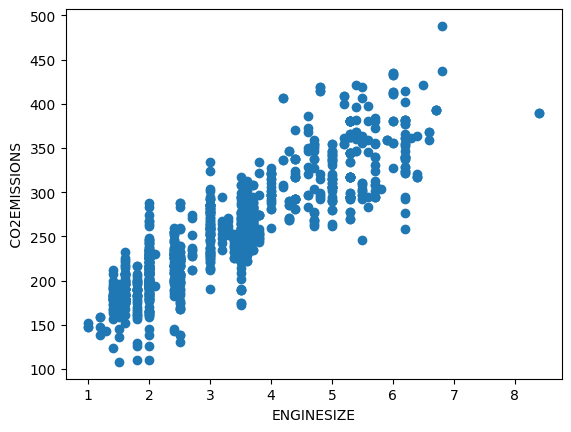

In [ ]:
#visualisasi grafik engine size dan co2 emission
x1 = df2[["ENGINESIZE"]]   # Feature
y = df2[["CO2EMISSIONS"]] # target

plt.scatter(x1,y)
plt.xlabel("ENGINESIZE")
plt.ylabel(" CO2EMISSIONS ")

**Cylinders vs CO₂ Emissions**

Grafik ini memperlihatkan pengaruh jumlah silinder (`CYLINDERS`) terhadap emisi CO₂ (`CO2EMISSIONS`). Kendaraan dengan lebih banyak silinder cenderung menghasilkan emisi CO₂ yang lebih tinggi.

Text(0, 0.5, ' CO2EMISSIONS ')

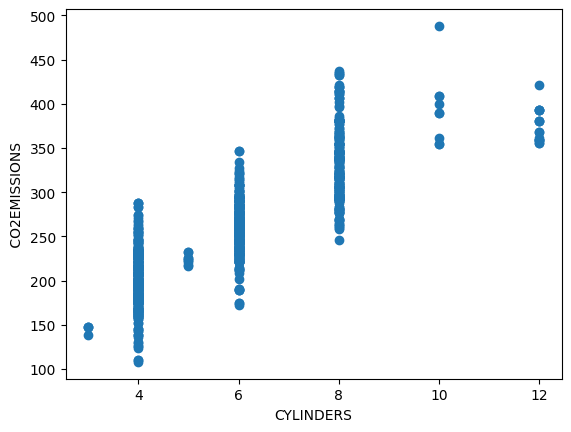

In [ ]:
#visualisasi grafik cylinders dan co2 emission
x2 = df2[["CYLINDERS"]]   # Feature
y = df2[["CO2EMISSIONS"]] # target

plt.scatter(x2,y)
plt.xlabel("CYLINDERS")
plt.ylabel(" CO2EMISSIONS ")

**Fuel Consumption (City) vs CO₂ Emissions**

Scatter plot ini menggambarkan hubungan antara konsumsi bahan bakar dalam kota (`FUELCONSUMPTION_CITY`) dan emisi CO₂(`CO2EMISSIONS`). Konsumsi bahan bakar yang lebih tinggi dalam kondisi perkotaan berbanding lurus dengan peningkatan emisi CO₂.  

Text(0, 0.5, ' CO2EMISSIONS ')

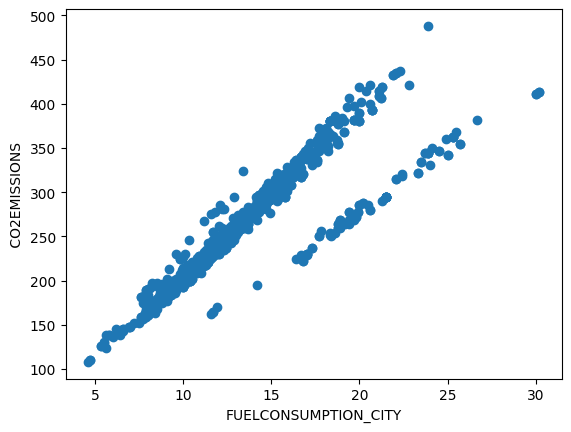

In [ ]:
#visualisasi grafik fuel consumption pada city dan co2 emission
x3 = df2[["FUELCONSUMPTION_CITY"]]   # Feature
y = df2[["CO2EMISSIONS"]] # target

plt.scatter(x3,y)
plt.xlabel("FUELCONSUMPTION_CITY")
plt.ylabel(" CO2EMISSIONS ")

**Fuel Consumption (Highway) vs CO₂ Emissions**

Grafik ini menunjukkan korelasi antara konsumsi bahan bakar di jalan tol (`FUELCONSUMPTION_HWY`) dan emisi CO₂ (`CO2EMISSIONS`). Konsumsi bahan bakar di jalan tol umumnya lebih rendah dibandingkan di dalam kota. Tetap terdapat pola peningkatan emisi CO₂ seiring bertambahnya konsumsi bahan bakar di jalan tol.

Text(0, 0.5, ' CO2EMISSIONS ')

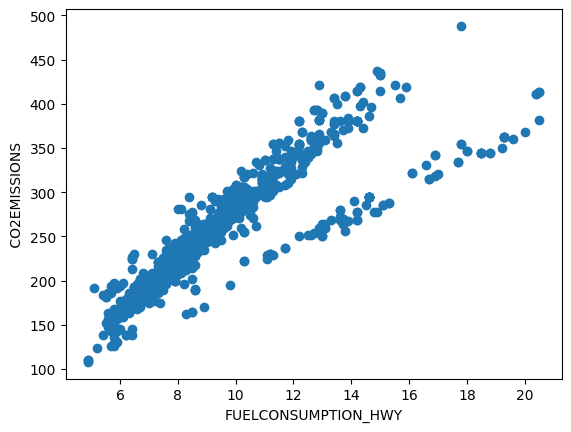

In [ ]:
#visualisasi grafik fuel consumption pada highway dan co2 emission
x4 = df2[["FUELCONSUMPTION_HWY"]]   # Feature
y = df2[["CO2EMISSIONS"]] # target

plt.scatter(x4,y)
plt.xlabel("FUELCONSUMPTION_HWY")
plt.ylabel(" CO2EMISSIONS ")

**Defining Variable**

Pada langkah ini, kami mendefinisikan variabel $x$ sebagai sekumpulan fitur independen (predictor) yang akan digunakan untuk memprediksi emisi CO₂, yaitu `ENGINESIZE`, `CYLINDERS`, `FUELCONSUMPTION_CITY`, dan `FUELCONSUMPTION_HWY`. Sementara itu, variabel $y$ didefinisikan sebagai target atau variabel dependen, yaitu `CO2EMISSIONS`. Dengan pemisahan ini, model regresi nantinya akan belajar bagaimana variabel-variabel fitur mempengaruhi nilai emisi CO₂.

In [ ]:
x = df2[["ENGINESIZE" , "CYLINDERS", "FUELCONSUMPTION_CITY" , "FUELCONSUMPTION_HWY"]]   # Feature
y = df2[["CO2EMISSIONS"]] # target

### **Membuat Model Multiple Linear Regression**  

Pada supervised learning, kami perlu membagi data minimal menjadi dua bagian:  
* **Data Training** – digunakan untuk melatih model  
* **Data Testing** – digunakan untuk menguji performa model  

Pembagian ini bisa dilakukan secara manual, misalnya dengan mengambil 50% data pertama sebagai data training dan sisanya sebagai data testing. Namun, cara yang lebih umum adalah menggunakan fungsi `train_test_split` dari library **scikit-learn**. Secara default, fungsi ini membagi data dengan proporsi 75% untuk training dan 25% untuk testing, tetapi proporsi ini bisa disesuaikan dengan parameter `test_size`.  

Karena kami menggunakan **Multiple Linear Regression**, model akan belajar hubungan antara lebih dari satu fitur independen (`ENGINESIZE`, `CYLINDERS`, `FUELCONSUMPTION_CITY`, `FUELCONSUMPTION_HWY`) dengan variabel target (`CO2EMISSIONS`). Penggunaan `random_state` memastikan bahwa pembagian data bersifat **reproducible**, sehingga hasil eksperimen dapat diulang dengan dataset yang sama.

####**Data Training and Data Testing Split**

Kami membagi dataset menjadi **data training** dan **data testing** menggunakan fungsi `train_test_split` dari **scikit-learn**.  

- Variabel **x_train** dan **y_train** berisi **70% data** yang digunakan untuk melatih model.

- Variabel **x_test** dan **y_test** berisi **30% data** yang digunakan untuk menguji model.

Parameter `random_state=1` memastikan bahwa pembagian data selalu sama setiap kali kode dijalankan, sehingga hasilnya dapat direproduksi.  

Setelah pemisahan, **y_train** menampilkan target variabel `CO2EMISSIONS` dari **data training**, dan **x_test** menampilkan fitur `ENGINESIZE`, `CYLINDERS`, `FUELCONSUMPTION_CITY`, dan `FUELCONSUMPTION_HWY` dari **data testing**.

In [ ]:
from sklearn.model_selection import train_test_split as tts
x_train , x_test ,y_train , y_test = tts(x,y, test_size=0.3 , random_state = 1)
print(y_train)
print(x_test)

      CO2EMISSIONS
69             356
697            196
705            170
521            244
474            322
...            ...
847            200
715            175
905            292
235            244
1061           258

[746 rows x 1 columns]
     ENGINESIZE  CYLINDERS  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY
133         3.0          6                  13.6                  9.8
340         1.4          4                  10.0                  7.2
948         2.0          4                   9.6                  7.1
704         2.0          4                   8.0                  5.8
661         4.6          8                  15.7                 11.8
..          ...        ...                   ...                  ...
538         5.6          8                  15.0                 10.2
106         4.4          8                  15.0                  9.8
923         6.6         12                  19.1                 12.3
23          2.0          4                  11.5

Linear Regression ada di ScikitLearn dengan fungsi LinearRegression(). Membuat model dengan method `.fit`

Pada langkah ini, kami membuat **model regresi linear** menggunakan **Scikit-Learn** dengan fungsi `LinearRegression()`.  

1. **Membuat objek model** [`simple_lr_model = LinearRegression()`] → yang akan digunakan untuk membangun hubungan antara fitur (x) dan target (y).  
2. **Melatih model (fitting)** [`simple_lr_model.fit(x_train, y_train)`] → di mana model mempelajari hubungan antara variabel independen (**x_train**) dan variabel dependen (**y_train**) berdasarkan data training.  

Setelah proses ini, model siap digunakan untuk melakukan prediksi terhadap data baru.

In [ ]:
from sklearn.linear_model import LinearRegression
simple_lr_model = LinearRegression()

# proses utama pembuatan model (model fitting)
simple_lr_model.fit(x_train,y_train)

LinearRegression()

Sampai di sini sebenarnya pembuatan model machine learning sudah selesai. Tetapi kita butuh untuk mengetes seberapa baik model yang sudah kita buat. Hal ini dinyatakan dengan seberapa dekat hasil prediksi yang dibuat oleh model, dengan nilai seharusnya.

Untuk regresi, biasanya metrik ukuran yang sering digunakan ada 4:
* **MAE (Mean absolute error)** adalah rata-rata perbedaan absolut dari nilai sebenarnya dan nilai hasil prediksi dari kumpulan data
* **MSE (Mean Squared Error)** adalah kuadrat dari rata-rata  perbedaan antara nilai sebenarnya dan nilai hasil prediksi dari kumpulan data.
* **RMSE (Root Mean Squared Error**) adalah nilai akar-kuadrat dari MSE.
* **R-squared (Coefficient of determination)** mewakili koefisien seberapa baik nilai-nilai tersebut dibandingkan dengan nilai aslinya (goodness of fit). R-squared bernilai 0 sampai 1. Semakin tinggi nilainya (semakin mendekati 1), semakin baik modelnya.

#### **Training Error**

Pertama, kami menghitung terlebih dahulu **training error**, yang menyatakan besarnya eror terhadap data training (data yang digunakan untuk membuat model).

Pada langkah ini, kami mengevaluasi performa model dengan menghitung **training error**, yaitu seberapa baik model memprediksi data yang digunakan dalam pelatihan (**x_train**).  

1. **Membuat prediksi pada data training**  [`y_train_pred = simple_lr_model.predict(x_train)`] → di mana model yang telah dilatih digunakan untuk memprediksi nilai `CO2EMISSIONS` berdasarkan data training.  
2. **Menghitung metrik evaluasi**
   - **R² Score (`r2_score`)** → Mengukur sejauh mana model menjelaskan variasi dalam data. Nilai mendekati **1** berarti model memiliki prediksi yang baik.  
   - **MSE (Mean Squared Error)** → Menghitung rata-rata kuadrat selisih antara nilai prediksi dan nilai sebenarnya.  
   - **RMSE (Root Mean Squared Error)** → Akar kuadrat dari **MSE**, memberikan interpretasi dalam satuan yang sama dengan variabel target.  

Hasil metrik ini menunjukkan seberapa baik model mempelajari pola dalam data training. Jika error terlalu besar, model mungkin perlu diperbaiki atau ditingkatkan.

Hasil evaluasi menunjukkan bahwa model memiliki **R² = 0.84** yang berarti model dapat menjelaskan **84% variasi** dalam data training, menunjukkan performa yang cukup baik. **MSE = 537.29** dan **RMSE = 23.18** menunjukkan tingkat kesalahan dalam satuan CO₂ emissions, di mana rata-rata prediksi memiliki deviasi sekitar **23.18** dari nilai sebenarnya. Meskipun error masih ada, nilai R² yang cukup tinggi menunjukkan bahwa model telah berhasil menangkap pola utama dalam data.

In [ ]:
# hasil prediksi y dari data train
y_train_pred = simple_lr_model.predict(x_train)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print("R2 Value : ", r2_score(y_train_pred , y_train))
print("MSE Value : ",mean_squared_error(y_train_pred, y_train))
print("RMSE Value : ",np.sqrt(mean_squared_error(y_train_pred, y_train)))

R2 Value :  0.8405535824620628
MSE Value :  537.2955525920224
RMSE Value :  23.17963659318287


####**Testing Error**

Kemudian, kami menghitung **testing error**,  yang menyatakan besarnya eror terhadap data testing. Testing eror inilah yang sering digunakan untuk menyatakan keberhasilan membuat model dan dapat dibandingkan dengan akurasi pembuatan model dengan algoritma yang lain untuk mencari mana yang terbaik.

Pada langkah ini, kami mengevaluasi performa model dengan menghitung **testing error**, yaitu seberapa baik model memprediksi data yang **tidak digunakan dalam pelatihan** (`x_test`).  

1. **Membuat prediksi pada data uji** [`y_pred = simple_lr_model.predict(x_test)`] → Model yang telah dilatih digunakan untuk memprediksi nilai **CO2EMISSIONS** berdasarkan data uji (`x_test`).  

2. **Menghitung metrik evaluasi**  
   - **R² Score (`r2_score`)** → Mengukur sejauh mana model menjelaskan variasi dalam data uji. Nilai yang mendekati **1** menunjukkan model yang baik.  
   - **MSE (Mean Squared Error)** → Menghitung rata-rata kuadrat selisih antara nilai prediksi (`y_pred`) dan nilai sebenarnya (`y_test`). Semakin kecil nilainya, semakin baik modelnya.  
   - **RMSE (Root Mean Squared Error)** → Akar kuadrat dari **MSE**, memberikan interpretasi dalam satuan yang sama dengan variabel target (**CO2EMISSIONS**).  

Perbedaan antara **training error** dan **testing error** dapat membantu mengidentifikasi **overfitting** atau **underfitting**. Jika hasilnya cukup stabil seperti dalam kasus ini, berarti model memiliki **generalisasi yang baik** terhadap data baru.

Hasilnya, **R² = 0.84** menunjukkan bahwa model masih dapat menjelaskan sekitar **84% variasi** dalam data uji, yang konsisten dengan hasil training. **MSE = 565.19** dan **RMSE = 23.77** menunjukkan tingkat kesalahan dalam prediksi, yang sedikit lebih tinggi dibandingkan dengan training error. Jika perbedaan antara training dan testing error besar, maka hal itu merupakan indikasi overfitting. Tetapi dalam model kami, hasil yang didapatkan cukup stabil, menunjukkan bahwa model dapat melakukan generalisasi dengan baik.

In [ ]:
# hasil prediksi y dari data test
y_pred = simple_lr_model.predict(x_test)

print("R2 Value : ", r2_score(y_pred , y_test))
print("MSE Value : ",mean_squared_error(y_pred, y_test))
print("RMSE Value : ",np.sqrt(mean_squared_error(y_pred, y_test)))

R2 Value :  0.8428279165994214
MSE Value :  565.195120326552
RMSE Value :  23.77383268062918


Dari sini dapat dibandingkan antara testing error dan training error. Biasanya testing error > training error. Namun, semakin baik model maka perbedaannya tidak begitu jauh.

Kami membandingkan **hasil prediksi model dengan nilai sebenarnya** menggunakan **scatter plot**, yang membantu melihat seberapa akurat model dalam memprediksi **CO2EMISSIONS** pada data uji (`x_test`).  

1. **Melakukan Prediksi pada Data Uji**  
   [`y_pred = simple_lr_model.predict(x_test)`] →
   Model yang telah dilatih digunakan untuk memprediksi **CO2EMISSIONS** berdasarkan fitur dalam **x_test**. Hasil prediksi disimpan dalam `y_pred`.  

2. **Membuat Scatter Plot untuk Evaluasi Model**  
   - `plt.scatter(y_test, y_pred, color='blue', alpha=0.5)` → Membuat scatter plot di mana **sumbu X** adalah nilai asli (`y_test`), dan **sumbu Y** adalah nilai prediksi (`y_pred`). Jika model sempurna, titik-titik akan sejajar pada garis diagonal.  
   - `plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')` → Menambahkan **garis referensi (y = x)** sebagai pembanding. Semakin dekat titik-titik dengan garis ini, semakin akurat prediksi model.  

Hasil prediksi dengan nilai sebenarnya dapat digambarkan dengan grafik sebagai berikut.

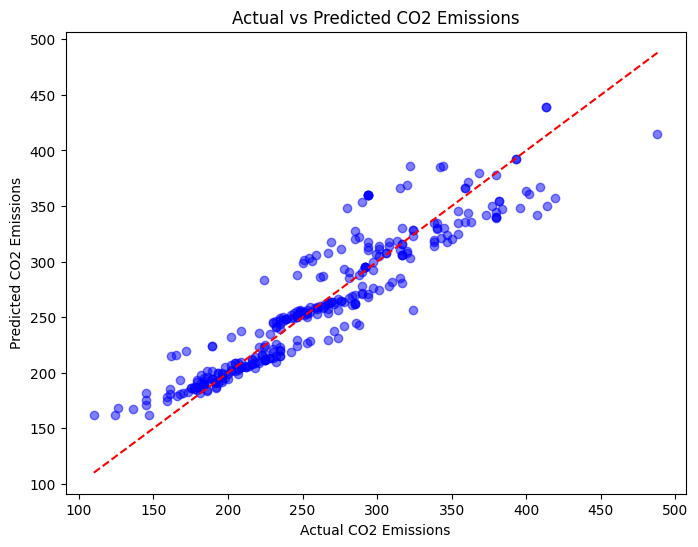

In [ ]:
# Prediksi menggunakan model yang sudah dilatih
y_pred = simple_lr_model.predict(x_test)

# Scatter plot antara y_test (asli) vs y_pred (prediksi)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel("Actual CO2 Emissions")
plt.ylabel("Predicted CO2 Emissions")
plt.title("Actual vs Predicted CO2 Emissions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Garis y=x untuk referensi
plt.show()

Terakhir, kami mengekstrak parameter utama dari model regresi linear, yaitu **intercept (bias)** dan **koefisien regresi (bobot) untuk setiap fitur**. **Intercept** menunjukkan nilai awal CO2EMISSIONS ketika semua fitur bernilai nol, sedangkan **koefisien regresi** menunjukkan seberapa besar perubahan dalam CO2EMISSIONS ketika setiap fitur meningkat satu satuan, dengan asumsi fitur lainnya tetap konstan. Setelah mendapatkan nilai ini, kami mencetak bias dan bobot untuk setiap fitur (`ENGINESIZE`, `CYLINDERS`, `FUELCONSUMPTION_CITY`, dan `FUELCONSUMPTION_HWY`).

Persamaan regresi linear dapat disusun dalam bentuk eksplisit sebagai

**$y = 68.47 + 11.70 x_1 + 6.64 x_2 + 6.17x_3 + 2.99x_4$**

yang menggambarkan hubungan antara variabel input dengan output yang diprediksi.

In [ ]:
# Ambil intercept (bias)
constant = simple_lr_model.intercept_[0]

# Ambil bobot (koefisien regresi) untuk semua fitur
weights = simple_lr_model.coef_[0]

# Cetak konstanta (bias)
print("Bias/konstanta:", constant)

# Cetak bobot untuk setiap fitur
for i, feature in enumerate(x.columns):
    print(f"Bobot/gradien untuk {feature}: {weights[i]}")

# Tampilkan persamaan model
equation = "y = {:.2f}".format(constant)
for i, feature in enumerate(x.columns):
    equation += " + {:.2f}*x{}".format(weights[i], i+1)

print("Persamaan model:", equation)

Bias/konstanta: 68.46933173282588
Bobot/gradien untuk ENGINESIZE: 11.701758656807728
Bobot/gradien untuk CYLINDERS: 6.640823567739734
Bobot/gradien untuk FUELCONSUMPTION_CITY: 6.168799482504966
Bobot/gradien untuk FUELCONSUMPTION_HWY: 2.99229333949425
Persamaan model: y = 68.47 + 11.70*x1 + 6.64*x2 + 6.17*x3 + 2.99*x4


##**6. Metode Regresi dengan Gradient Descent**

Metode MLR di atas adalah metode regresi yang diselesaikan dengan metode matematika biasa. Sedangkan untuk memahami konsep machine learning, maka di sini kita akan membuktikan bahwa untuk mencari persamaan garis juga bisa dilakukan dengan dengan metode ***gradient descent*** yang merupakan salah satu metode inti dari machine learning dan pada khususnya *artificial neural network* (ANN).

Gradient descent pada regresi linier tujuannya adalah menemukan m dan c yang benar yang akan memberikan model terbaik, yang seharusnya mendekati hasil m dan c dengan metode MLR.

Sebelum mulai maka perlu diinisialisasikan nilai m dan c, dengan suatu angka tetap (misal 0) atau nilai random.

In [ ]:
# Konversi data ke array
X = np.array(x_train)
Y = np.array(y_train).reshape(-1, 1)  # Pastikan Y berbentuk kolom
print(x_train)
print(x_train.shape)
print(X.shape)

      ENGINESIZE  CYLINDERS  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY
69           6.0         12                  18.8                 11.5
697          2.0          4                   9.3                  7.6
705          2.5          4                   8.4                  6.1
521          2.4          4                  11.6                  9.3
474          6.2          8                  23.3                 16.1
...          ...        ...                   ...                  ...
847          1.6          4                   9.3                  7.9
715          2.5          4                   8.8                  6.2
905          4.8          8                  15.1                  9.7
235          2.4          4                  12.2                  8.6
1061         3.2          6                  13.0                  8.9

[746 rows x 4 columns]
(746, 4)
(746, 4)


In [ ]:
# Inisialisasi parameter bobot (m1, m2, m3, m4) dan bias (c)
c = 0  # Bias diinisialisasi dengan 0
m = np.zeros((4,1))  # Bobot untuk 4 fitur diinisialisasi 0

In [ ]:
print(c)
print(m)
print(X)
print (np.isnan(np.min(X)))
print(np.isnan(np.min(m)))
print(m)

0
[[0.]
 [0.]
 [0.]
 [0.]]
[[ 6.  12.  18.8 11.5]
 [ 2.   4.   9.3  7.6]
 [ 2.5  4.   8.4  6.1]
 ...
 [ 4.8  8.  15.1  9.7]
 [ 2.4  4.  12.2  8.6]
 [ 3.2  6.  13.   8.9]]
False
False
[[0.]
 [0.]
 [0.]
 [0.]]


Dalam machine learning, terdapat istilah **parameter** dan **hyperparameter**.

Parameter adalah variabel yang akan dicari selama mesin "belajar". Contoh dalam regresi linier, maka m dan c adalah parameter.

Hyperparameter adalah variabel pembelajaran yang perlu disetting dari awal dengan cara ditebak, atau dengan metode pencarian tertentu atau optimasi. Contoh dalam regresi linier dengan gradient descent, maka **learning rate** dan **epoch** merupakan hyperparameter. Seringkali tantangan dalam machine learning ini adalah mencari hyperparameter yang tepat.

Note:
* learning rate = laju pembelajaran
* epoch = jumlah iterasi pembelajaran untuk 1 set data. Contoh jika ada 500 data training, maka 1 epoch artinya mesin sudah belajar untuk ke-500 data tersebut sebanyak 1 kali

In [ ]:
# Setting hyperparameter (ditebak/brute force atau menggunakan metode optimasi)
# Coba ubah-ubah L dan epoch. Apa yang dapat diamati?

# Hyperparameter
L = 0.001  # Learning rate
epochs = 100000  # Jumlah iterasi
n = float(len(X))  # Jumlah sampel
print(n)


746.0


###The Gradient Descent Algorithm
https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931

Gradient descent is an iterative optimization algorithm to find the minimum of a function. Here that function is our Loss Function.

Understanding Gradient Descent
<img src="https://miro.medium.com/max/1400/1*N5WjbzwsCFse-KPjBWZZ6g.jpeg">
Illustration of how the gradient descent algorithm works

Imagine a valley and a person with no sense of direction who wants to get to the bottom of the valley. He goes down the slope and takes large steps when the slope is steep and small steps when the slope is less steep. He decides his next position based on his current position and stops when he gets to the bottom of the valley which was his goal.
Let’s try applying gradient descent to m and c and approach it step by step:
1. Initially let m = 0 and c = 0. Let L be our learning rate. This controls how much the value of m changes with each step. L could be a small value like 0.0001 for good accuracy.
2. Calculate the partial derivative of the loss function with respect to m, and plug in the current values of x, y, m and c in it to obtain the derivative value D.

Derivative with respect to m, Dm:

<img src="https://miro.medium.com/max/800/1*FvYfCBrl2gX9K-KxSO1eIw.jpeg">

Similarly lets find the partial derivative with respect to c, Dc:

<img src="https://miro.medium.com/max/600/1*rj09w2TcBxnHPtQ0oq4ehA.jpeg">

3. Now we update the current value of m and c using the following equation:

<img src="https://miro.medium.com/max/600/1*JDcHqFK8jLcgQu1cj2XuVQ.jpeg">

4. We repeat this process until our loss function is a very small value or ideally 0 (which means 0 error or 100% accuracy). The value of m and c that we are left with now will be the optimum values.

Now going back to our analogy, m can be considered the current position of the person. D is equivalent to the steepness of the slope and L can be the speed with which he moves. Now the new value of m that we calculate using the above equation will be his next position, and L×D will be the size of the steps he will take. When the slope is more steep (D is more) he takes longer steps and when it is less steep (D is less), he takes smaller steps. Finally he arrives at the bottom of the valley which corresponds to our loss = 0.
Now with the optimum value of m and c our model is ready to make predictions !

In [ ]:
print("N:",n)
print("X.T:",X.T)

# Gradient Descent
for i in range(epochs):
    Y_pred = np.dot(X, m) + c  # Prediksi Y saat ini
    D_m = (-2/n) * np.dot(X.T, (Y - Y_pred))  # Turunan bobot
    D_c = (-2/n) * np.sum(Y - Y_pred)  # Turunan bias
    m = m - L * D_m  # Update bobot
    c = c - L * D_c  # Update bias

# Menampilkan hasil akhir
print("Bias/konstanta : ", c)
print("Bobot/gradien : ", m.flatten())
print("Persamaan model : y = %.2f + %.2f x1 + %.2f x2 + %.2f x3 + %.2f x4" % (c, m[0][0], m[1][0], m[2][0], m[3][0]))


N: 746.0
X.T: [[ 6.   2.   2.5 ...  4.8  2.4  3.2]
 [12.   4.   4.  ...  8.   4.   6. ]
 [18.8  9.3  8.4 ... 15.1 12.2 13. ]
 [11.5  7.6  6.1 ...  9.7  8.6  8.9]]
Bias/konstanta :  68.44672929550163
Bobot/gradien :  [11.69431019  6.64700571  6.16787131  2.9947449 ]
Persamaan model : y = 68.45 + 11.69 x1 + 6.65 x2 + 6.17 x3 + 2.99 x4


In [ ]:
print(np.isnan(X).sum(), "NaN dalam X")
print(np.isnan(m).sum(), "NaN dalam m")
print(np.isinf(X).sum(), "Inf dalam X")
print(np.isinf(m).sum(), "Inf dalam m")

0 NaN dalam X
0 NaN dalam m
0 Inf dalam X
0 Inf dalam m


Kita akan membandingkan hasil dengan metode gradient descent ini apakah sudah sama atau mendekati hasil dari MLR dengan cara menghitung testing errornya.

Kita dapat mengganti hyperparameter dan inisialisasi parameter di awal. Perhatikan bahwa setiap kali penggantian nilai-nilai tersebut, maka bisa jadi kita mendapatkan hasil akhir yang berbeda, sehingga testing error nya pun berbeda.

Oleh karena itu, untuk seluruh algoritma machine learning yang memiliki nilai parameter yang random di awal, maka percobaan harus dilakukan berulang kali. Menurut prinsip statistika, maka pengulangan harus dilakukan > 30 kali sebagai syarat asumsi distribusi normal.

In [ ]:
# Uji model
X_test = np.array(x_test)
Y_true = np.array(y_test).reshape(-1, 1)
print(X_test.shape)
print(m.shape)
Y_pred = np.dot(X_test, m) + c

# Evaluasi model
print("R2 Value : ", r2_score(Y_true, Y_pred))
print("MSE Value : ", mean_squared_error(Y_true, Y_pred))
print("RMSE Value : ", np.sqrt(mean_squared_error(Y_true, Y_pred)))


(321, 4)
(4, 1)
R2 Value :  0.867028533327496
MSE Value :  565.1790694867611
RMSE Value :  23.773495104564688


##**Closing**

Sebelumnya, dengan simple linear regression kami sudah berhasil mengetahui:
* Metode SLR 1 variabel dengan Scikit Learn
* Metode Linear regression dengan Gradient Descent
* Metrik pengukuran regresi: MAE, MSE, RMSE, R-square

Kami menggunakan parameter $c$ untuk bias dan $m$ untuk bobot, untuk 1 variabel $x$.

####**Multiple Linear Regression**

Pada **Multiple Linear Regression**, kami akan memiliki banyak fitur/variabel, yaitu $x_{1}$, $x_{2}$, ... , $x_{n}$. Untuk menyesuaikan dengan banyak literatur maka untuk selanjutnya kami dapat mengubah penamaan variabel menjadi:

* Bias           = $θ_{0}$ = $m_{0}$
* Bobot (weight) = $θ_{1}$, $θ_{2}$, ... , $θ_{n}$ = $m_{1}$, $m_{2}$, ... ,$m_{n}$